In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import os
print(os.listdir("../input"))
from keras.utils import to_categorical
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


In [2]:
(xtrain,ytrain),(xvalid,yvalid)=mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [3]:
xtrain1=xtrain.astype(np.float32)/255
xvalid1=xvalid.astype(np.float32)/255
ytrain1=to_categorical(ytrain,10)
yvalid1=to_categorical(yvalid,10)


In [4]:
n_neurons=256
N=len(xtrain1)

In [5]:
x=tf.placeholder(tf.float32,shape=[None,28,28])
y=tf.placeholder(tf.float32,shape=[None,10])

In [6]:
cell1=tf.nn.rnn_cell.BasicRNNCell(n_neurons)
output,state=tf.nn.dynamic_rnn(cell1,x,dtype=tf.float32)  #initial state is default to zero but can be set to anything
# example encoder decoder network

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [7]:
from tensorflow.contrib.layers import fully_connected

In [8]:
logits=fully_connected(state,10,activation_fn=None)

In [9]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y))

In [10]:
optimize=tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [11]:
prediction=tf.argmax(tf.nn.softmax(logits),axis=1)
accuracy=tf.reduce_mean(tf.cast(tf.equal(prediction,tf.argmax(y,axis=1)),tf.float32))*100

In [12]:
init=tf.global_variables_initializer()
    

In [13]:
Ntrain=len(xtrain)
batchsize=128
epochs=500

In [14]:
trainloss=[]
validloss=[]
trainacc=[]
validacc=[]
with tf.Session() as s:
    s.run(init)
    batch_x1=xtrain1
    batch_y1=ytrain1
    batch_valid_x=xvalid1
    batch_valid_y=yvalid1
    for i in range(epochs):
        indx=np.random.choice(Ntrain,batchsize,replace=False)
        batch_x=xtrain1[indx]
        batch_y=ytrain1[indx]
        feeddict={x:batch_x,y:batch_y}
        _,batchloss=s.run([optimize,cross_entropy],feed_dict=feeddict)
        if i%10==0:
            #Trainaccuracy and trainloss
            #indx1=np.random.choice(Ntrain,batchsize,replace=False)
            feeddict1={x:batch_x1,y:batch_y1}
            batch_train_acc,batch_train_loss=s.run([accuracy,cross_entropy],feed_dict=feeddict1)
            print("epoch:",i,' trainloss:',batch_train_loss,'trainacc:',batch_train_acc)
            trainacc.append(batch_train_acc)
            trainloss.append(batch_train_loss)
            
            
            feeddict2={x:batch_valid_x,y:batch_valid_y}
            batch_valid_acc,batch_valid_loss=s.run([accuracy,cross_entropy],feed_dict=feeddict2)
            print("epoch:",i,' validloss:',batch_valid_loss,'validacc:',batch_valid_acc)
            validacc.append(batch_valid_acc)
            validloss.append(batch_valid_loss)
            print( " ")

epoch: 0  trainloss: 2.217788 trainacc: 19.755
epoch: 0  validloss: 2.2161555 validacc: 19.84
 
epoch: 10  trainloss: 1.1390555 trainacc: 66.475
epoch: 10  validloss: 1.1196653 validacc: 67.78
 
epoch: 20  trainloss: 0.8738244 trainacc: 71.596664
epoch: 20  validloss: 0.85825545 validacc: 71.75
 
epoch: 30  trainloss: 0.7573206 trainacc: 76.35167
epoch: 30  validloss: 0.72808045 validacc: 77.240005
 
epoch: 40  trainloss: 0.6896975 trainacc: 78.425
epoch: 40  validloss: 0.6610361 validacc: 79.759995
 
epoch: 50  trainloss: 0.64832014 trainacc: 80.27833
epoch: 50  validloss: 0.63088584 validacc: 80.98
 
epoch: 60  trainloss: 0.5405696 trainacc: 84.08333
epoch: 60  validloss: 0.5296977 validacc: 83.990005
 
epoch: 70  trainloss: 0.45623615 trainacc: 86.293335
epoch: 70  validloss: 0.44447124 validacc: 86.78
 
epoch: 80  trainloss: 0.51451415 trainacc: 84.08333
epoch: 80  validloss: 0.50151056 validacc: 84.81
 
epoch: 90  trainloss: 0.45495248 trainacc: 86.285
epoch: 90  validloss: 0.4467

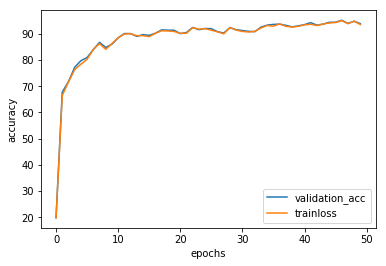

In [15]:
plt.plot(validacc,label='validation_acc')
plt.plot(trainacc,label='trainloss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

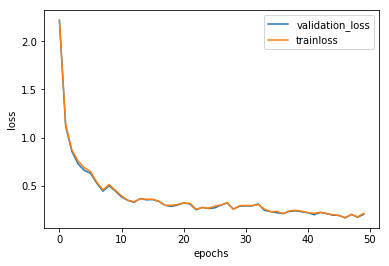

In [16]:
plt.plot(validloss,label='validation_loss')
plt.plot(trainloss,label='trainloss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [17]:
ncells=2

**MULTIRNN Implementation**

In [18]:
cell_layer=[tf.nn.rnn_cell.BasicRNNCell(n_neurons) for i in range(ncells)]

In [19]:
multicell1=tf.nn.rnn_cell.MultiRNNCell(cell_layer)
outputs,state=tf.nn.dynamic_rnn(multicell1,x,dtype=tf.float32)

In [20]:
outputs.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(256)])

In [21]:
len(state)

2

In [22]:
logits=fully_connected(state[-1],10,activation_fn=None)

In [23]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y))

In [24]:
optimize=tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [25]:
prediction=tf.argmax(tf.nn.softmax(logits),axis=1)
accuracy=tf.reduce_mean(tf.cast(tf.equal(prediction,tf.argmax(y,axis=1)),tf.float32))*100

In [26]:
init=tf.global_variables_initializer()
Ntrain=len(xtrain)
batchsize=128
epochs=500    

In [27]:
trainloss=[]
validloss=[]
trainacc=[]
validacc=[]
with tf.Session() as s:
    s.run(init)
    batch_x1=xtrain1
    batch_y1=ytrain1
    batch_valid_x=xvalid1
    batch_valid_y=yvalid1
    for i in range(epochs):
        indx=np.random.choice(Ntrain,batchsize,replace=False)
        batch_x=xtrain1[indx]
        batch_y=ytrain1[indx]
        feeddict={x:batch_x,y:batch_y}
        _,batchloss=s.run([optimize,cross_entropy],feed_dict=feeddict)
        if i%10==0:
            #Trainaccuracy and trainloss
            #indx1=np.random.choice(Ntrain,batchsize,replace=False)
            feeddict1={x:batch_x1,y:batch_y1}
            batch_train_acc,batch_train_loss=s.run([accuracy,cross_entropy],feed_dict=feeddict1)
            print("epoch:",i,' trainloss:',batch_train_loss,'trainacc:',batch_train_acc)
            trainacc.append(batch_train_acc)
            trainloss.append(batch_train_loss)
            
            
            feeddict2={x:batch_valid_x,y:batch_valid_y}
            batch_valid_acc,batch_valid_loss=s.run([accuracy,cross_entropy],feed_dict=feeddict2)
            print("epoch:",i,' validloss:',batch_valid_loss,'validacc:',batch_valid_acc)
            validacc.append(batch_valid_acc)
            validloss.append(batch_valid_loss)
            print( " ")

epoch: 0  trainloss: 2.161183 trainacc: 18.321667
epoch: 0  validloss: 2.1603923 validacc: 17.730001
 
epoch: 10  trainloss: 0.9162141 trainacc: 70.22333
epoch: 10  validloss: 0.9128329 validacc: 70.6
 
epoch: 20  trainloss: 0.7256967 trainacc: 76.36667
epoch: 20  validloss: 0.71538615 validacc: 77.07
 
epoch: 30  trainloss: 0.57018125 trainacc: 81.776665
epoch: 30  validloss: 0.56046396 validacc: 81.89
 
epoch: 40  trainloss: 0.5531218 trainacc: 82.708336
epoch: 40  validloss: 0.5338675 validacc: 83.8
 
epoch: 50  trainloss: 0.48011914 trainacc: 85.098335
epoch: 50  validloss: 0.45704907 validacc: 86.21
 
epoch: 60  trainloss: 0.43749493 trainacc: 86.901665
epoch: 60  validloss: 0.4281688 validacc: 87.55
 
epoch: 70  trainloss: 0.38283724 trainacc: 88.36167
epoch: 70  validloss: 0.38311395 validacc: 88.58
 
epoch: 80  trainloss: 0.48361367 trainacc: 84.84333
epoch: 80  validloss: 0.46903515 validacc: 85.439995
 
epoch: 90  trainloss: 0.39354068 trainacc: 88.31
epoch: 90  validloss: 0.

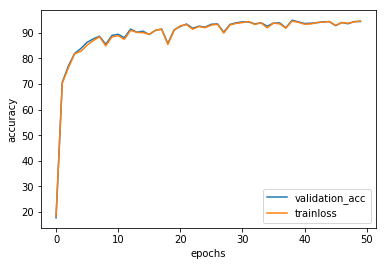

In [28]:
plt.plot(validacc,label='validation_acc')
plt.plot(trainacc,label='trainloss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

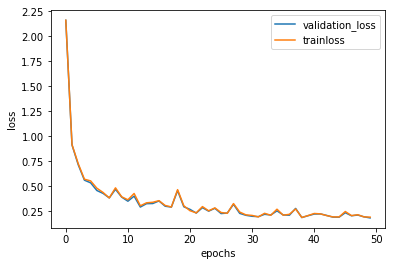

In [29]:
plt.plot(validloss,label='validation_loss')
plt.plot(trainloss,label='trainloss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [30]:
#stacking RNNs on top increased accuracy by 1%